<a href="https://colab.research.google.com/github/KalitaMariano/Monitoramento-de-Temperatura-na-Logistica-Farmac-utica/blob/main/C%C3%B3pia_de_%C3%A1reas_de_armazenamento_crx_05_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas matplotlib seaborn


Valores inválidos em 'TIME':
Series([], Name: TIME, dtype: object)


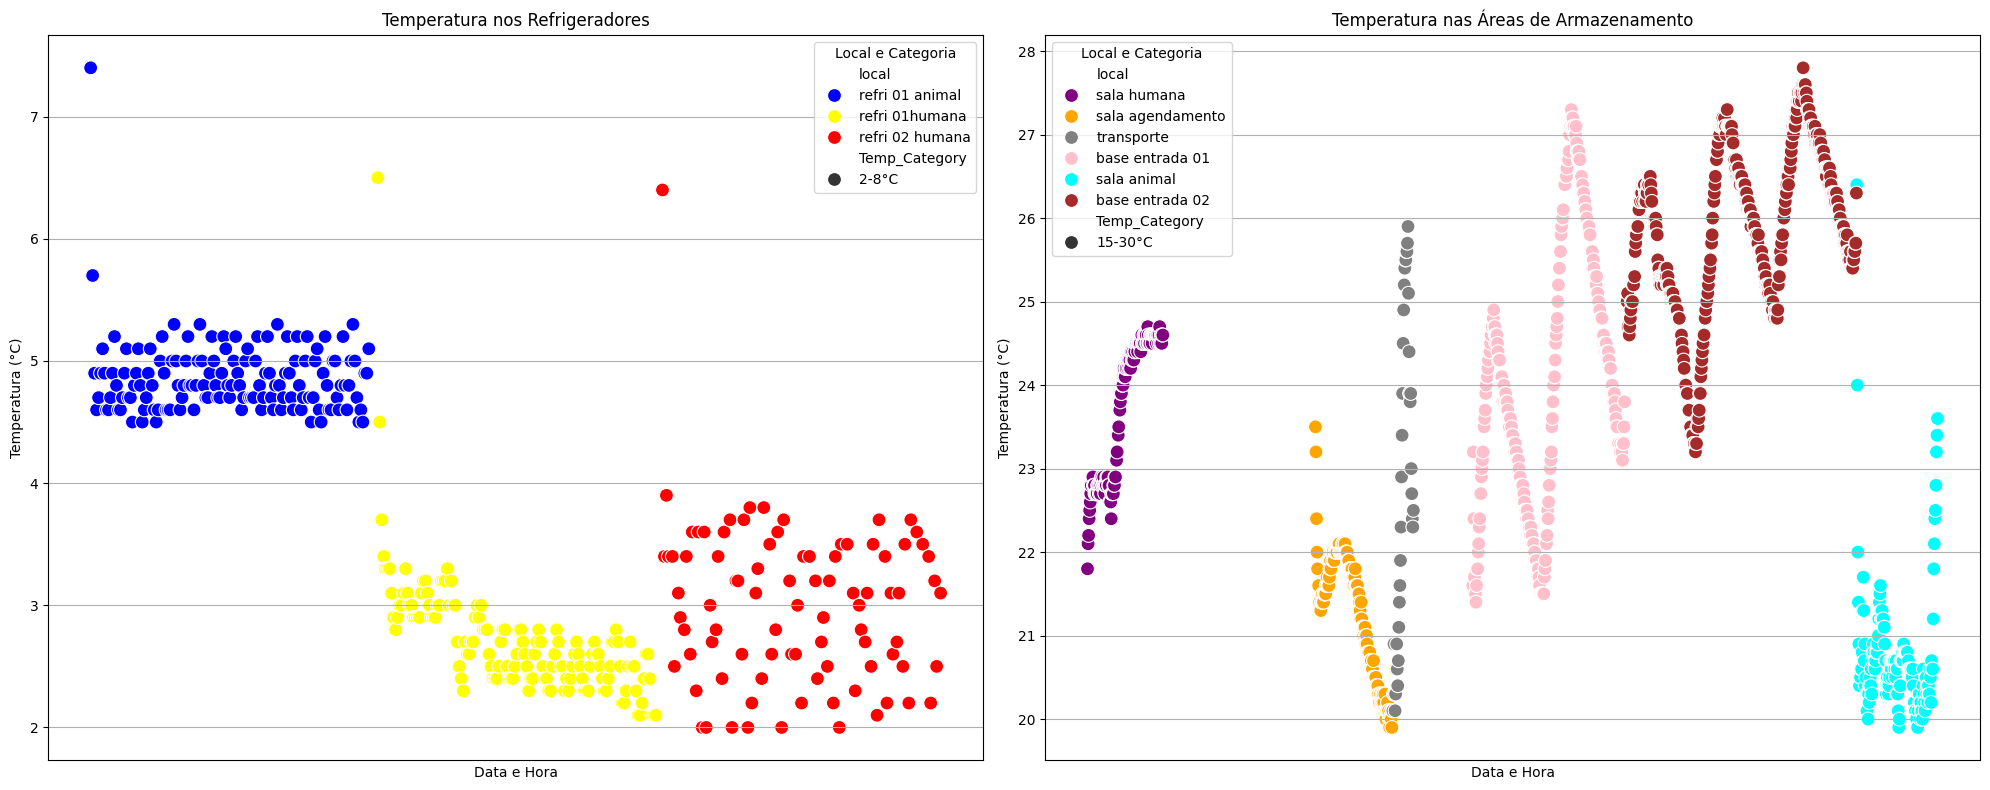

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo Excel
file_path = '/content/drive/MyDrive/A3/Maio/10 min/temp_areas_armazenamento_med.xlsx'
data = pd.read_excel(file_path)

# Verificar e corrigir os nomes das colunas
data.rename(columns=lambda x: x.strip(), inplace=True)

# Converter a coluna 'TIME' para string e remover espaços extras
data['TIME'] = data['TIME'].astype(str).str.strip()

# Identificar e lidar com valores inválidos na coluna 'TIME'
invalid_time_values = data['TIME'][~data['TIME'].str.match(r'\d{2}-\d{2}-\d{2}/\d{2}:\d{2}:\d{2}')]
print("Valores inválidos em 'TIME':")
print(invalid_time_values)

# Remover linhas com valores inválidos na coluna 'TIME'
data = data[data['TIME'].str.match(r'\d{2}-\d{2}-\d{2}/\d{2}:\d{2}:\d{2}')]

# Converter a coluna 'TIME' para o formato datetime
data['TIME'] = pd.to_datetime(data['TIME'], format='%d-%m-%y/%H:%M:%S', errors='coerce')

# Separar a coluna 'TIME' em duas colunas: 'DATE' e 'HOUR'
data['DATE'] = data['TIME'].dt.date
data['HOUR'] = data['TIME'].dt.time

# Combinar 'DATE' e 'HOUR' em uma única coluna 'DATETIME'
data['DATETIME'] = pd.to_datetime(data['DATE'].astype(str) + ' ' + data['HOUR'].astype(str))

# Categorizar as temperaturas conforme as faixas fornecidas
def categorize_temp(temp):
    if 2 <= temp <= 8:
        return '2-8°C'
    elif 15 <= temp <= 30:
        return '15-30°C'
    else:
        return 'Outros'

data['Temp_Category'] = data['Temp(C)'].apply(categorize_temp)

# Dividir os dados em dois conjuntos: Refri e Outros
data_refri = data[data['local'].str.contains('refri', case=False)]
data_outros = data[~data['local'].str.contains('refri', case=False)]

# Ajustar o dicionário da paleta com base nos valores reais na coluna 'local'
palette_refri = {
    'refri 01 animal': 'blue',
    'refri 01humana': 'yellow',
    'refri 02 humana': 'red'
}

# Definir a paleta de cores para os demais locais
palette_outros = {
    'sala agendamento': 'orange',
    'sala humana': 'purple',
    'base entrada 02': 'brown',
    'base entrada 01': 'pink',
    'transporte': 'gray',
    'sala animal': 'cyan'
}

# Criar os gráficos lado a lado
plt.figure(figsize=(20, 8))

# Gráfico para locais de Refri sem a categoria "Outros"
plt.subplot(1, 2, 1)
sns.scatterplot(data=data_refri[data_refri['Temp_Category'] != 'Outros'], x='DATETIME', y='Temp(C)', hue='local', palette=palette_refri, style='Temp_Category', s=100)
plt.title('Temperatura nos Refrigeradores')
plt.xlabel('Data e Hora')
plt.ylabel('Temperatura (°C)')
plt.legend(title='Local e Categoria')
plt.xticks([], [])  # Remover rótulos do eixo x
plt.grid(True)

# Gráfico para os demais locais
plt.subplot(1, 2, 2)
sns.scatterplot(data=data_outros, x='DATETIME', y='Temp(C)', hue='local', palette=palette_outros, style='Temp_Category', s=100)
plt.title('Temperatura nas Áreas de Armazenamento')
plt.xlabel('Data e Hora')
plt.ylabel('Temperatura (°C)')
plt.legend(title='Local e Categoria')
plt.xticks([], [])  # Remover rótulos do eixo x
plt.grid(True)

# Ajustar layout e mostrar os gráficos
plt.tight_layout()
plt.show()


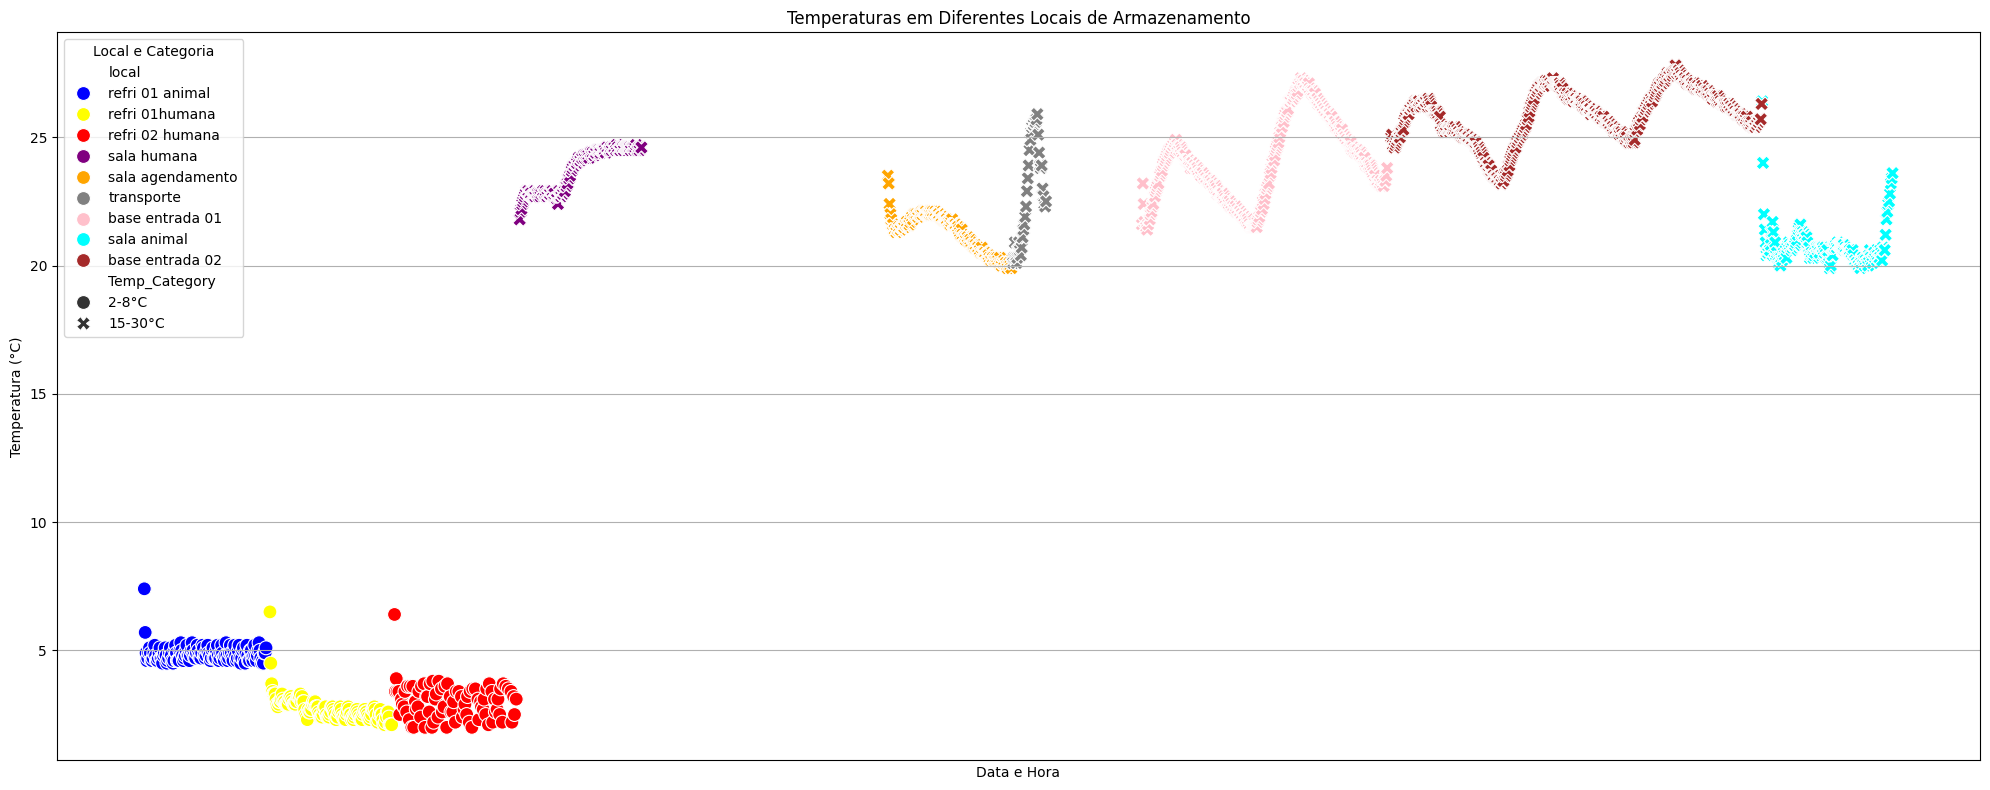

In [ ]:

data['Temp_Category'] = data['Temp(C)'].apply(categorize_temp)

# Definir a paleta de cores para os locais
palette = {
    'refri 01 animal': 'blue',
    'refri 01humana': 'yellow',
    'refri 02 humana': 'red',
    'sala agendamento': 'orange',
    'sala humana': 'purple',
    'base entrada 02': 'brown',
    'base entrada 01': 'pink',
    'transporte': 'gray',
    'sala animal': 'cyan'
}

# Criar o gráfico
plt.figure(figsize=(20, 8))

# Gráfico para todos os locais juntos
sns.scatterplot(data=data[data['Temp_Category'] != 'Outros'], x='DATETIME', y='Temp(C)', hue='local', palette=palette, style='Temp_Category', s=100)
plt.title('Temperaturas em Diferentes Locais de Armazenamento')
plt.xlabel('Data e Hora')
plt.ylabel('Temperatura (°C)')
plt.legend(title='Local e Categoria')
plt.xticks([], [])  # Remover rótulos do eixo x
plt.grid(True)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

In [ ]:
summary_stats = data.groupby('local')['Temp(C)'].describe()

In [ ]:
print("Resumo estatístico para cada local de refrigeração:")
summary_stats

Resumo estatístico para cada local de refrigeração:


,count,mean,std,min,25%,50%,75%,max
local,,,,,,,,
base entrada 01,283.0,24.078445,1.583849,21.4,22.90,24.0,25.2,27.3
base entrada 02,427.0,25.857143,1.021007,23.2,25.20,26.0,26.6,27.8
refri 01 animal,141.0,4.861702,0.311370,4.5,4.70,4.8,5.0,7.4
refri 01humana,141.0,2.713475,0.478274,2.1,2.40,2.6,2.9,6.5
refri 02 humana,141.0,2.438298,0.895597,1.0,1.70,2.4,3.2,6.4
sala agendamento,143.0,21.273427,0.742090,19.9,20.60,21.5,21.9,23.5
sala animal,151.0,20.765563,0.819922,19.9,20.30,20.6,20.8,26.4
sala humana,141.0,23.724823,0.845421,21.8,22.80,24.2,24.5,24.7
transporte,40.0,22.790000,2.003433,20.1,20.85,22.6,24.6,25.9


<Axes: xlabel='local', ylabel='std'>

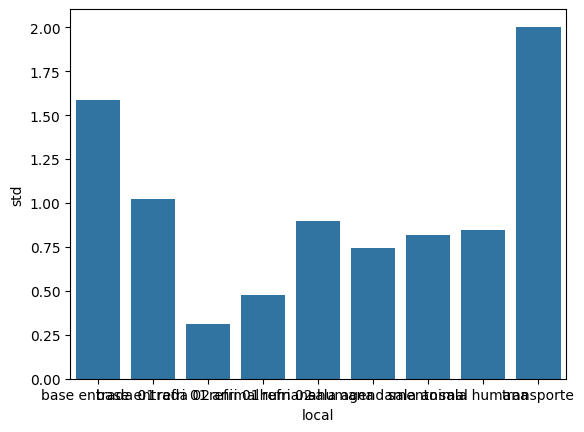

In [ ]:
# @title Standard deviation of wait time by location

sns.barplot(x = 'local', y = 'std', data = summary_stats)